# Generación y visualización de pseudo-aleatorios

# Maestría en Ciencia de Datos

## Francisco ME

---

### Importar librerias

Se importan todas las dependencias del código

In [1]:
# Importar librerias
import numpy as np                # funciones numericas
import pandas as pd               # data frames
import matplotlib.pyplot as plot  # visualización aburrida de datos
import plotly.graph_objects as go # visualización dinámica de datos

### Fijar la semilla para aleatorios

Se fija una semilla para la generación de los pseudo-aleatorios. Con esto, cada que se corra el código serán generados los mismos aleatorios.

In [2]:
np.random.seed(2)

### Ejercicio 1: Experimento con dados

Emule el experimento de obtener la suma de dos dados, genere una lista aleatoria con los resultados de 1000 lanzamientos (note que no todos los resultados son igual de probables). Tip: choice.

In [46]:
n = [np.random.randint(low=1, high=6, size=2).sum() for _ in range(1000)]

In [ ]:
n

### Ejercicio 2: Caja con canicas

Suponga que tiene una caja con dos canicas rojas, tres azules y 5 blancas. Quiere emular el proceso de sacar 3 canicas de la caja de forma que no se regresa la canica que ya se sacó. Cree una lista con los resultados de 10 experimentos (es decir, una lista de 10 listas con 3 elementos). Puede utilizar números en vez de colores si lo considera necesario.

In [4]:
colores = ['azul', 'roja', 'blanca']
repeticion = [2, 3, 5]
caja = [colores[i] for i in range(len(colores)) for j in range(repeticion[i])]
experimento = [np.random.choice(caja, 3, replace=False) for _ in range(10)]

In [45]:
experimento

[array(['roja', 'roja', 'blanca'], dtype='<U6'),
 array(['azul', 'blanca', 'roja'], dtype='<U6'),
 array(['blanca', 'roja', 'azul'], dtype='<U6'),
 array(['roja', 'roja', 'roja'], dtype='<U6'),
 array(['roja', 'blanca', 'roja'], dtype='<U6'),
 array(['roja', 'roja', 'blanca'], dtype='<U6'),
 array(['blanca', 'blanca', 'roja'], dtype='<U6'),
 array(['blanca', 'roja', 'blanca'], dtype='<U6'),
 array(['azul', 'roja', 'blanca'], dtype='<U6'),
 array(['azul', 'blanca', 'roja'], dtype='<U6')]

### Ejercicio 3: Contestar Examen

Utilice distribución binomial para emular el evento de contestar un examen de 10 preguntas, cada una de 4 opciones (sólo una correcta). Entregue una lista con las calificaciones de 500 exámenes contestados aleatoriamente.

In [48]:
preguntas = ['pregunta_' + str(i) for i in range(1, 11)]
opciones = ['A', 'B', 'C', 'D']
resultados = pd.DataFrame({'e_' + str(i): np.random.binomial(n=1, p=.25, size=10) for i in range(500)}, index=preguntas)
calificaciones = resultados.sum()

### Ejercicio 4: Crucero de coches

Se sabe que por un crucero pasan en promedio 20 coches por minuto. Con una distribución de Poisson emule aleatoriamente los resultados de tomar mediciones cada minuto durante una hora. ¿Cuál fue el mayor y el menor valor obtenido?

In [6]:
trafico = np.random.poisson(lam=20, size=60)
t_max = trafico.min()
t_min = trafico.max()

### Ejercicio 5: Estaturas de poblacion

Si sabemos que las estaturas de cierta población se distribuyen de forma normal con una media de 1.68 m y una desviación estándar de 0.14 m. Genere una lista aleatoria para emular una muestra de 500 personas. ¿Cuál es la estatura promedio de la muestra? ¿Cuál fue la menor y la mayor estatura obtenida?

In [7]:
media = 1.68
desvest = 0.14
muestra = np.random.normal(loc=media, scale=desvest, size=500)
mean_m = muestra.mean()
min_m = muestra.min()
max_m = muestra.max()

### Ejercicio 6: Barras de metal

Los valores del largo de barras de metal en una fábrica están entre 80 y 90 cm. El valor esperado del largo de una barra es de 83 cm y se sabe que las probabilidades a partir de este valor a los extremos decrecen linealmente. Genere un histograma con 10 clases a partir de la emulación de una muestra aleatoria de 10,000 barras.

In [8]:
minimo = 80
maximo = 90
esperado = 83
clases = 10
muestra = 10000
valores = np.random.triangular(left=minimo, mode=esperado, right=maximo, size=muestra)

##### Visualización con Matplotlib

(array([ 356., 1026., 1667., 1772., 1556., 1284., 1004.,  730.,  463.,
         142.]),
 array([80.04635381, 81.03420299, 82.02205216, 83.00990134, 83.99775051,
        84.98559969, 85.97344886, 86.96129804, 87.94914721, 88.93699639,
        89.92484556]),
 <a list of 10 Patch objects>)

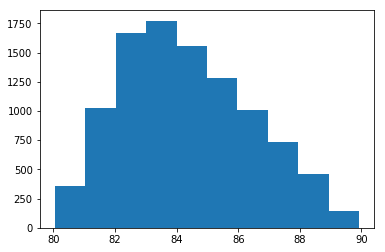

In [40]:
plot.hist(x=valores, bins=clases)

##### Visualización con Plotly

In [41]:
n_bins = 10 # Numero de bins
bins_size = (max(valores) - min(valores))/n_bins # Calculo para distribuir valores en numero de bins elegido
color_a = '#047CFB' # Un color chido

# Inicializar un objeto tipo figura
fig = go.Figure()

# Agregar un trazo tipo histograma
fig.add_trace(go.Histogram(x=valores, # Valores 
                           histnorm='probability', # Tipo de histograma
                           name='largo de barras', # Nombre para identificar el trazo
                           xbins=dict(start=min(valores), end=max(valores), size=bins_size), # Info para bins
                           marker_color=color_a, # Color del marcador, en este caso las barras
                           opacity=0.75, # Opacidad de los elementos del trazo, en este caso las barras
                           # Constructor de mensaje en HTML
                           hovertemplate = '<i>Probabilidad</i>: %{y} <br><b>Rango de longitud</b>: %{x} cm <br>'))

# Actualizar el layout de titulos y ejes
fig.update_layout(
    title=dict(x=0.5, text='<b>Histograma de probabilidad:</b> Longitud de barras'),
    xaxis=dict(title_text='Longitud'), # Etiquetas de eje x
    yaxis=dict(title_text='Probabilidad'), # Etiquetas de eje y
    bargap=0.01 # Espacio entre las barras 
)

# Al hacer hover o "mouse over" en las barras que se trunque a 2 decimales en los numeros y expersarlo en %
fig.update_yaxes(hoverformat='%.2f')

# Al hacer hover o "mouse over" en las barras que se trunque a 2 decimales en los numeros
fig.update_xaxes(hoverformat=".2f")

# Mostrar grafica
fig.show()

### Ejercicio 7: Exponencial Vs Gamma

Para hacer una comparación entre la distribución exponencial y la distribución gamma, genere una lista de 10000 muestras exponenciales con media 10, y otra con 10000 muestras gamma con α =2 y β=5. Dibuje los histogramas de ambas en la misma gráfica y el mismo número de barras. ¿Qué observa?

In [38]:
muestras_e = 10000
media_e = 10
muestras_g = 10000
alfa_g = 2
beta_g = 5
barras = 10
exp = np.random.exponential(scale=media_e, size=muestras_e)
gam = np.random.gamma(shape=alfa_g, scale=beta_g, size=muestras_g)

##### Visualización con Matplotlib

(array([3.444e+03, 3.548e+03, 1.816e+03, 7.220e+02, 2.870e+02, 1.230e+02,
        4.300e+01, 1.200e+01, 4.000e+00, 1.000e+00]),
 array([3.49876148e-02, 6.12392480e+00, 1.22128620e+01, 1.83017992e+01,
        2.43907364e+01, 3.04796735e+01, 3.65686107e+01, 4.26575479e+01,
        4.87464851e+01, 5.48354223e+01, 6.09243595e+01]),
 <a list of 10 Patch objects>)

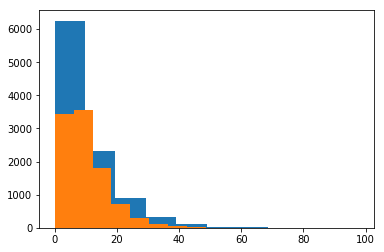

In [42]:
plot.hist(x=exp, bins=barras)
plot.hist(x=gam, bins=barras)

##### Visualización con Plotly

In [39]:
exp_n_bins = 10 # Numero de bins Exponencial
exp_bins_size = (max(exp) - min(exp))/exp_n_bins # Calculo para distribuir valores en numero de bins elegido
exp_color_a = '#047CFB' # Un color chido para Exponencial

gam_n_bins = 10 # Numero de bins Gamma
gam_bins_size = (max(gam) - min(gam))/gam_n_bins # Calculo para distribuir valores en numero de bins elegido
gam_color_b = '#42c29b' # Un color chido para Gamma

# Inicializar un objeto tipo figura
fig = go.Figure()

# Agregar un trazo tipo histograma: Distribucion Exponencial
fig.add_trace(go.Histogram(x=exp, # Valores 
                           histnorm='probability', # Tipo de histograma
                           name='Exponencial', # Nombre para identificar el trazo
                           xbins=dict(start=min(exp), end=max(exp), size=exp_bins_size), # Info para bins
                           marker_color=exp_color_a, # Color del marcador, en este caso las barras
                           opacity=0.75)) # Opacidad de los elementos del trazo, en este caso las barras
                           # Constructor de mensaje en HTML

# Agregar un trazo tipo histograma: Distribucion Exponencial
fig.add_trace(go.Histogram(x=gam, # Valores 
                           histnorm='probability', # Tipo de histograma
                           name='Gamma', # Nombre para identificar el trazo
                           xbins=dict(start=min(gam), end=max(gam), size=gam_bins_size), # Info para bins
                           marker_color=gam_color_b, # Color del marcador, en este caso las barras
                           opacity=0.75)) # Opacidad de los elementos del trazo, en este caso las barras
                           # Constructor de mensaje en HTML
                           

# Actualizar el layout de titulos y ejes
fig.update_layout(barmode='overlay',
    title=dict(x=0.5, text='<b>Histogramas de probabilidad:</b> Exponencial y Gamma'),
    xaxis=dict(title_text='Valores'), # Etiquetas de eje x
    yaxis=dict(title_text='Probabilidad'), # Etiquetas de eje y
    bargap=0.01 # Espacio entre las barras 
)

# Al hacer hover o "mouse over" en las barras que se trunque a 2 decimales en los numeros y expersarlo en %
fig.update_yaxes(hoverformat='%.2f')

# Al hacer hover o "mouse over" en las barras que se trunque a 2 decimales en los numeros
fig.update_xaxes(hoverformat=".2f")

# Mostrar grafica
fig.show()